In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/pima_indian_data.csv')

In [3]:
df

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##**Exploring the data**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skinfold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.isnull().sum()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

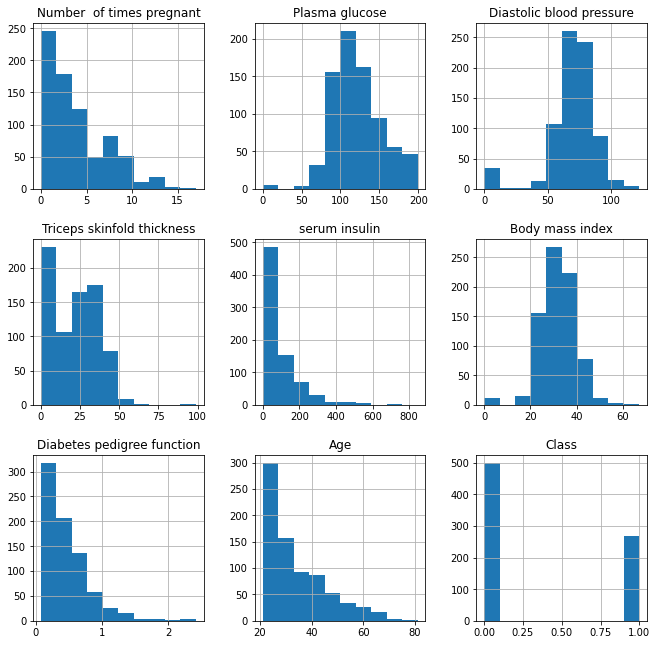

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(11,11))
plt.show()

In [7]:
X = df[0:-1]
y = df['Class']

dataDf = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
dataDf.columns = list(X) + ['target']

pd.set_option('display.max_columns', 50)
dataDf.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class,target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,1


##**Splitting the data into Train and Test sets**

In [8]:
from sklearn.model_selection import train_test_split
def generate_splits():
    y = df['Class']
    X = df[[x for x in df.columns if x != 'Class']]

    return train_test_split(X, y, test_size=0.15)
X_train, X_test, y_train, y_test = generate_splits()

In [9]:
print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 652
Test sample: 116


#**Creating a Pipeline**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [11]:
y_hat = m.predict(X_test)

#**Classification Report**

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        76
           1       0.68      0.42      0.52        40

    accuracy                           0.73       116
   macro avg       0.71      0.66      0.67       116
weighted avg       0.72      0.73      0.71       116



*As we see from the precision and the recall scores the Precision, recall and f1-score for the 0's tend to be good where as the for the 1's tend to less and suprising very less for the recall and the f1scores are less than 0.5 which implies to not a good score. These decreases the overall score of accuracy because of the 1's.*

##**Predicting the probability of a binary outcome**

In [13]:
from sklearn.metrics import roc_curve

In [14]:
def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

In [15]:
def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr

In [16]:
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))

In [17]:
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

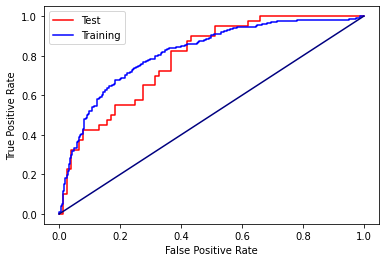

In [18]:
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='-')
plt.show()

The above Roc cure interprets that, 1

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, generate_probs(X_test))

0.7861842105263157

#**Creating a Logistic Regression pipeline**

**Using liblnear solver**

In [20]:
lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )

##**Performing Grid search Cross validation**

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'logreg__C': [1, 10, 100, 1000]}
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

In [22]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
gcv_results.best_score_

0.7714503816793893

In [24]:
gcv_results.best_params_

{'logreg__C': 10}

In [25]:
gcv_results.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

**Using sag solver**

In [26]:
lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('logreg', LogisticRegression(penalty='l2', solver='sag'))
        ]
    )

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'logreg__C': [1, 10, 100, 1000]}
 ]

gcv_results1 = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results1 = gcv_results1.fit(X_train, y_train)

In [28]:
gcv_results1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [29]:
gcv_results1.best_score_

0.7714503816793893

In [30]:
gcv_results.best_params_

{'logreg__C': 10}